In [1]:
from groq import Groq
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Markdown, Latex

In [2]:
from keys import GROQ_KEY
client = Groq(api_key=GROQ_KEY) 

In [3]:
image_path = "output.png"
with open(image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read()).decode("utf-8")

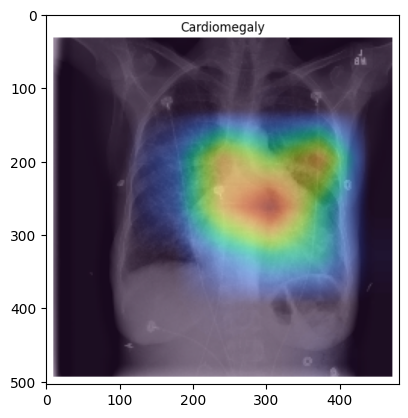

**Disease: Cardiomegaly**

**Position:** The cardiomegaly is located in the center of the chest, within the cardiac silhouette.

**Shape:** The cardiac silhouette appears enlarged and globular in shape.

**Size:** The size of the cardiac silhouette is increased, extending beyond the normal expected borders. 
- Transverse diameter appears to be wider than usual.
- The cardiac silhouette occupies a larger portion of the thoracic cavity. 

The heatmap overlay indicates areas of high activation, suggesting that the enlarged cardiac silhouette is the primary focus.

In [4]:
completion = client.chat.completions.create(
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    messages=[        {
            "role": "system",
            "content": "You are an Radiologist, your task is to locate the disease from scans with gradcam heatmap overlay to assist you and describe its shape and size. Always give straighforward answer"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Disease Found Cardeomegaly. Determine is position, shape and size."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{base64_image}"
                    }
                }
            ]
        }
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)

plt.imshow(Image.open("output.png"))
plt.show()
display(Markdown(completion.choices[0].message.content))
